## Setup Envirionment

In [ ]:
!pip install -q transformers datasets sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00


In [ ]:
# Importing the libraries needed
import pandas as pd
import numpy as np
import json
import os, pickle
import torch
import transformers
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
#import logging
#logging.basicConfig(level=logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## load files

In [ ]:
%cd /content/drive/MyDrive/00_torino_adnlp/output_dataset

/content/drive/.shortcut-targets-by-id/1XKzHbO8x1nqYdehS3HIKwyPXkXX3LRCU/output_dataset


In [ ]:
# open json files

with open('train_doc_info.pkl', 'rb') as f:
    train_doc_info = pickle.load(f)

with open('val_doc_info.pkl', 'rb') as f:
    val_doc_info = pickle.load(f)

with open('test_doc_info.pkl', 'rb') as f:
    test_doc_info = pickle.load(f)

with open('printed_doc_info.pkl', 'rb') as f:
    printed_doc_info = pickle.load(f)

with open('handwritten_doc_info.pkl', 'rb') as f:
    handwritten_doc_info = pickle.load(f)

In [ ]:
print("train_doc_info", train_doc_info.keys())
print("val_doc_info", val_doc_info.keys())
print("test_doc_info", test_doc_info.keys())
print("printed_doc_info", printed_doc_info.keys())
print("handwritten_doc_info", handwritten_doc_info.keys())

train_doc_info dict_keys(['01502814_page-0', '01311266_page-0', '01312096_page-0', '01314156_page-0', '01322021_page-0', '01327411_page-0', '01327879_page-0', '01330181_page-0', '01330743_page-0', '01331561_page-0', '01333748_page-0', '01334844_page-0', '01339499_page-0', '01342494_page-0', '01344731_page-0', '01346455_page-0', '01355023_page-0', '01359605_page-1', '01359608_page-1', '01368409_page-0', '01369341_page-0', '01370460_page-0', '01370855_page-0', '01372560_page-0', '01373528_page-0', '01376050_page-0', '01381847_page-0', '01382283_page-0', '01382666_page-0', '01383077_page-0', '01384450_page-0', '01385004_page-1', '01393056_page-0', '01395037_page-0', '01396709_page-0', '01397263_page-0', '01398740_page-0', '01398791_page-1', '01400324_page-0', '01403379_page-0', '01406011_page-0', '01407789_page-0', '01408127_page-1', '01408579_page-0', '01408937_page-1', '01413192_page-0', '01421331_page-0', '01421595_page-0', '01424210_page-0', '01424827_page-0', '01425017_page-0', '0143

#### check data samples

In [ ]:
train_doc_info['01502814_page-0']

{'name': '01502814_page-0.png',
 'height': 842,
 'width': 595,
 'objects': {0: {'global_id': 142,
   'image_id': 27,
   'bbox': [36.0, 243.0, 139.0, 11.0],
   'text': '1.  Details of substantial holder',
   'category_id': 2},
  1: {'global_id': 143,
   'image_id': 27,
   'bbox': [34.0, 400.0, 167.0, 12.0],
   'text': '2. Previous and present voting power:',
   'category_id': 2},
  2: {'global_id': 144,
   'image_id': 27,
   'bbox': [39.0, 529.0, 141.0, 11.0],
   'text': '3. Changes in relevant interests',
   'category_id': 2},
  3: {'global_id': 145,
   'image_id': 27,
   'bbox': [41.0, 420.0, 509.0, 32.0],
   'text': 'The total number of votes attached to all voting shares in the company or voting interests in the scheme that the substantial \nholder or an associate had a relevant interest in when last required, and when now required, to give a substantial holding notice \nto the company or scheme, are as follows:',
   'category_id': 3},
  4: {'global_id': 146,
   'image_id': 27,
   '

In [ ]:
# /content/drive/MyDrive/00_torino_adnlp/output_dataset/train_images/00824775_page-1.png

from PIL import Image

# Path to a local placeholder image
path = "train_images/00824775_page-1.png"

# Loading and displaying the image
img = Image.open(path)
img

In [ ]:
from os import listdir

train_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/train_images'
dev_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/val_images'
test_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/test_images'
printed_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images'
handwritten_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/handwritten_images'

In [ ]:
print(list(train_doc_info.keys())[:])

['01502814_page-0', '01311266_page-0', '01312096_page-0', '01314156_page-0', '01322021_page-0', '01327411_page-0', '01327879_page-0', '01330181_page-0', '01330743_page-0', '01331561_page-0', '01333748_page-0', '01334844_page-0', '01339499_page-0', '01342494_page-0', '01344731_page-0', '01346455_page-0', '01355023_page-0', '01359605_page-1', '01359608_page-1', '01368409_page-0', '01369341_page-0', '01370460_page-0', '01370855_page-0', '01372560_page-0', '01373528_page-0', '01376050_page-0', '01381847_page-0', '01382283_page-0', '01382666_page-0', '01383077_page-0', '01384450_page-0', '01385004_page-1', '01393056_page-0', '01395037_page-0', '01396709_page-0', '01397263_page-0', '01398740_page-0', '01398791_page-1', '01400324_page-0', '01403379_page-0', '01406011_page-0', '01407789_page-0', '01408127_page-1', '01408579_page-0', '01408937_page-1', '01413192_page-0', '01421331_page-0', '01421595_page-0', '01424210_page-0', '01424827_page-0', '01425017_page-0', '01432424_page-0', '01434090_p

In [ ]:
page = train_doc_info['01502814_page-0'] # doc_info[name]

print(page['name'])
print(page['objects'])
print(len(page['objects']))


01502814_page-0.png
{0: {'global_id': 142, 'image_id': 27, 'bbox': [36.0, 243.0, 139.0, 11.0], 'text': '1.  Details of substantial holder', 'category_id': 2}, 1: {'global_id': 143, 'image_id': 27, 'bbox': [34.0, 400.0, 167.0, 12.0], 'text': '2. Previous and present voting power:', 'category_id': 2}, 2: {'global_id': 144, 'image_id': 27, 'bbox': [39.0, 529.0, 141.0, 11.0], 'text': '3. Changes in relevant interests', 'category_id': 2}, 3: {'global_id': 145, 'image_id': 27, 'bbox': [41.0, 420.0, 509.0, 32.0], 'text': 'The total number of votes attached to all voting shares in the company or voting interests in the scheme that the substantial \nholder or an associate had a relevant interest in when last required, and when now required, to give a substantial holding notice \nto the company or scheme, are as follows:', 'category_id': 3}, 4: {'global_id': 146, 'image_id': 27, 'bbox': [175.0, 464.0, 69.0, 10.0], 'text': 'Previous Notice', 'category_id': 3}, 5: {'global_id': 147, 'image_id': 27

In [ ]:
for p in page:
  print(p)

name
height
width
objects


In [ ]:
print(page['objects'][0]['bbox'])

[36.0, 243.0, 139.0, 11.0]


In [ ]:
for p in page['objects']:
  print(page['objects'][p]['bbox'])

# page = train_doc_info['01502814_page-0']['objects']
# for p in page:
#   print(page[p]['bbox'])

# coco format
# [x_min, y_min, width, height]
# (𝑥𝑖, 𝑦𝑖 ,𝑤𝑖, ℎ𝑖) # in the FormNLU paper
# https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/#coco

[36.0, 243.0, 139.0, 11.0]
[34.0, 400.0, 167.0, 12.0]
[39.0, 529.0, 141.0, 11.0]
[41.0, 420.0, 509.0, 32.0]
[175.0, 464.0, 69.0, 10.0]
[356.0, 465.0, 65.0, 9.0]
[221.0, 40.0, 99.0, 33.0]
[149.0, 86.0, 287.0, 14.0]
[40, 122, 123, 12]
[41, 255, 25, 9]
[35, 265, 77, 11]
[34, 295, 110, 33]
[35, 338, 123, 22]
[35, 368, 123, 11]
[41, 462, 81, 12]
[176, 485, 64, 11]
[265, 485, 60, 12]
[356, 485, 68, 11]
[438, 485, 59, 11]
[41, 218, 51, 9]
[171.0, 121.0, 111.0, 91.0]
[173.0, 218.0, 55.0, 12.0]
[168.0, 253.0, 317.0, 11.0]
[169.0, 265.0, 82.0, 11.0]
[175.0, 295.0, 47.0, 12.0]
[174.0, 337.0, 49.0, 12.0]
[175.0, 368.0, 47.0, 12.0]
[39.0, 498.0, 107.0, 9.0]
[175.0, 498.0, 49.0, 9.0]
[266.0, 498.0, 33.0, 9.0]
[356.0, 497.0, 49.0, 11.0]
[436.0, 498.0, 35.0, 9.0]


In [ ]:
# [x_min, y_min, width, height]
# converted to [x_min, y_min, x_max, y_max]
def bbox_convert(box):
  x, y, w, h = box
  return [x, y, x+w, y+h]

In [ ]:
# generate object list

# to make [x, y, w, h] format
def cord_bbox_convert(box):
  x1, y1, x2, y2 = box
  return [x1, y1, x2-x1, y2-y1]

# list(train_doc_info.keys())[:] # ['01502814_page-0', '01311266_page-0',...

for name in tqdm(list(train_doc_info.keys())[:]): # name  = '01502814_page-0'
      page = train_doc_info[name]                 # page = train_doc_info['01502814_page-0']
      page['object_list'] = []
      for obj in page['objects']:
          box = page['objects'][obj]['bbox']
          #print(box)
          page['object_list'].append(cord_bbox_convert(box)) # page['objects'][p]['bbox']

In [ ]:
train_doc_info['01502814_page-0']['object_list']

[[36.0, 243.0, 103.0, -232.0],
 [34.0, 400.0, 133.0, -388.0],
 [39.0, 529.0, 102.0, -518.0],
 [41.0, 420.0, 468.0, -388.0],
 [175.0, 464.0, -106.0, -454.0],
 [356.0, 465.0, -291.0, -456.0],
 [221.0, 40.0, -122.0, -7.0],
 [149.0, 86.0, 138.0, -72.0],
 [40, 122, 83, -110],
 [41, 255, -16, -246],
 [35, 265, 42, -254],
 [34, 295, 76, -262],
 [35, 338, 88, -316],
 [35, 368, 88, -357],
 [41, 462, 40, -450],
 [176, 485, -112, -474],
 [265, 485, -205, -473],
 [356, 485, -288, -474],
 [438, 485, -379, -474],
 [41, 218, 10, -209],
 [171.0, 121.0, -60.0, -30.0],
 [173.0, 218.0, -118.0, -206.0],
 [168.0, 253.0, 149.0, -242.0],
 [169.0, 265.0, -87.0, -254.0],
 [175.0, 295.0, -128.0, -283.0],
 [174.0, 337.0, -125.0, -325.0],
 [175.0, 368.0, -128.0, -356.0],
 [39.0, 498.0, 68.0, -489.0],
 [175.0, 498.0, -126.0, -489.0],
 [266.0, 498.0, -233.0, -489.0],
 [356.0, 497.0, -307.0, -486.0],
 [436.0, 498.0, -401.0, -489.0]]

In [ ]:
page = train_doc_info['01502814_page-0'] # doc_info[name]
image_name = page['name']

image_path = train_path +"/"+ image_name
image_path

'/content/drive/MyDrive/00_torino_adnlp/output_dataset/train_images/01502814_page-0.png'

In [ ]:
from PIL import Image

image = Image.open(image_path)
width, height = image.size
print(image)
#display(image.resize((int(400), int(400))))

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=595x842 at 0x7AF094FD4220>


## check huggingFace Resnet101 vs. pytorch

In [ ]:
from transformers import AutoFeatureExtractor, ResNetForImageClassification
import torch

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-101")

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


In [ ]:
inputs = feature_extractor(image, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.1290,  ..., 2.2489, 1.2557, 2.1975],
          [2.2489, 2.2489, 2.0263,  ..., 2.2489, 1.2557, 2.1975],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 1.2557, 2.1975]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.3060,  ..., 2.4286, 1.4132, 2.3761],
          [2.4286, 2.4286, 2.2010,  ..., 2.4286, 1.4132, 2.3761],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 1.4132, 2.3761]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400

In [ ]:
file_path = train_path
image_name = train_doc_info['01502814_page-0']['name']

image_path = file_path +"/"+ image_name
image = Image.open(image_path)
inputs = feature_extractor(image, return_tensors="pt")
inputs

In [ ]:
feature_extractor

ConvNextFeatureExtractor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ConvNextFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

In [ ]:
inputs['pixel_values'].shape

# [batch_size, channels, height, width]

torch.Size([1, 3, 224, 224])

## visual feature extraction code review

In [ ]:
import torch
from torchvision.ops import RoIAlign
from torchvision.models import resnet101
from torchvision import transforms
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet = resnet101(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-2])
resnet.to(device)
resnet.eval()

RoI Align
- https://github.com/pytorch/vision/blob/main/torchvision/ops/roi_align.py
- `torchvision.ops.roi_align`
- **Region of Interest (RoI)** :a region in a image where a potential object might be located in a object detection task
- bbox [x_min, y_min, width, height] (x, y, w, h)
- boxes (Tensor[K, 5] or List[Tensor[L, 4]]): the box coordinates in (x1, y1, x2, y2) format where the regions will be taken from.The coordinate must satisfy ``0 <= x1 < x2`` and ``0 <= y1 < y2``.

- then, (x, y, w, h) -> (x, y, x+w, y+h)




In [ ]:
roi_align = RoIAlign(output_size=(1, 1), spatial_scale=1/32, sampling_ratio=-1)

image = Image.open(image_path).convert('RGB')
#print(image)

preprocess = transforms.Compose([
    transforms.Resize((800, 800)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image)
print(input_tensor)
print(input_tensor.shape) # torch.Size([3, 800, 800])

input_batch = input_tensor.unsqueeze(0)
input_batch = input_batch.to(device, dtype = torch.float)

with torch.no_grad():
    res5_features = resnet(input_batch)

tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

        [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.

In [ ]:
rois = train_doc_info['01502814_page-0']['object_list'] # bbox list

image_indices = torch.zeros((len(rois), 1)) #32
image_indices = image_indices.to(device, dtype = torch.int)

rois = torch.tensor(rois).float()
rois = rois.to(device, dtype = torch.float)
rois = torch.cat((image_indices, rois), dim=1)

print(rois)

tensor([[   0.,   36.,  243.,  103., -232.],
        [   0.,   34.,  400.,  133., -388.],
        [   0.,   39.,  529.,  102., -518.],
        [   0.,   41.,  420.,  468., -388.],
        [   0.,  175.,  464., -106., -454.],
        [   0.,  356.,  465., -291., -456.],
        [   0.,  221.,   40., -122.,   -7.],
        [   0.,  149.,   86.,  138.,  -72.],
        [   0.,   40.,  122.,   83., -110.],
        [   0.,   41.,  255.,  -16., -246.],
        [   0.,   35.,  265.,   42., -254.],
        [   0.,   34.,  295.,   76., -262.],
        [   0.,   35.,  338.,   88., -316.],
        [   0.,   35.,  368.,   88., -357.],
        [   0.,   41.,  462.,   40., -450.],
        [   0.,  176.,  485., -112., -474.],
        [   0.,  265.,  485., -205., -473.],
        [   0.,  356.,  485., -288., -474.],
        [   0.,  438.,  485., -379., -474.],
        [   0.,   41.,  218.,   10., -209.],
        [   0.,  171.,  121.,  -60.,  -30.],
        [   0.,  173.,  218., -118., -206.],
        [ 

In [ ]:
pooled_features = roi_align(res5_features, rois)

roi_features = pooled_features.reshape(-1, 2048)

print(roi_features)
print(roi_features.shape) # torch.Size([32, 2048])

roi_features.tolist()

tensor([[2.0498e+00, 3.1340e-02, 0.0000e+00,  ..., 1.1222e+00, 4.1489e-02,
         7.4836e-02],
        [1.2475e+00, 2.1466e-02, 0.0000e+00,  ..., 1.7738e-01, 0.0000e+00,
         1.8900e-02],
        [1.8716e+00, 0.0000e+00, 0.0000e+00,  ..., 8.1513e-01, 1.2511e-03,
         1.4621e-01],
        ...,
        [1.3288e+00, 6.0367e-03, 0.0000e+00,  ..., 2.4374e-01, 0.0000e+00,
         1.7319e-01],
        [1.1441e+00, 3.0217e-03, 0.0000e+00,  ..., 5.8801e-01, 0.0000e+00,
         1.4082e-01],
        [1.2573e+00, 9.9251e-02, 0.0000e+00,  ..., 2.9652e-01, 0.0000e+00,
         1.4792e-01]])
torch.Size([32, 2048])


In [ ]:
page = train_doc_info['01502814_page-0']

page['visual_list'] = roi_features.tolist()


In [ ]:
print(page)

{'name': '01502814_page-0.png', 'height': 842, 'width': 595, 'objects': {0: {'global_id': 142, 'image_id': 27, 'bbox': [36.0, 243.0, 139.0, 11.0], 'text': '1.  Details of substantial holder', 'category_id': 2}, 1: {'global_id': 143, 'image_id': 27, 'bbox': [34.0, 400.0, 167.0, 12.0], 'text': '2. Previous and present voting power:', 'category_id': 2}, 2: {'global_id': 144, 'image_id': 27, 'bbox': [39.0, 529.0, 141.0, 11.0], 'text': '3. Changes in relevant interests', 'category_id': 2}, 3: {'global_id': 145, 'image_id': 27, 'bbox': [41.0, 420.0, 509.0, 32.0], 'text': 'The total number of votes attached to all voting shares in the company or voting interests in the scheme that the substantial \nholder or an associate had a relevant interest in when last required, and when now required, to give a substantial holding notice \nto the company or scheme, are as follows:', 'category_id': 3}, 4: {'global_id': 146, 'image_id': 27, 'bbox': [175.0, 464.0, 69.0, 10.0], 'text': 'Previous Notice', 'ca

## ROI feature extraction (Run this code)

In [ ]:
import torch
from torchvision.ops import RoIAlign
from torchvision.models import resnet101
from torchvision import transforms
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet = resnet101(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-2])
resnet.to(device)
resnet.eval()


def extract_roi_features(image_path, rois):
    roi_align = RoIAlign(output_size=(1, 1), spatial_scale=1/32, sampling_ratio=-1)

    image = Image.open(image_path).convert('RGB')

    preprocess = transforms.Compose([
        transforms.Resize((800, 800)),  # resize the image to (800, 800) for simplicity
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)
    input_batch = input_batch.to(device, dtype = torch.float)

    with torch.no_grad():
        res5_features = resnet(input_batch)

    image_indices = torch.zeros((len(rois), 1))
    image_indices = image_indices.to(device, dtype = torch.int)

    rois = torch.tensor(rois).float()
    rois = rois.to(device, dtype = torch.float)
    rois = torch.cat((image_indices, rois), dim=1)
    pooled_features = roi_align(res5_features, rois)

    roi_features = pooled_features.reshape(-1, 2048)

    return roi_features.tolist()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 134MB/s]


In [ ]:
# check code for train_doc_info

file_path = train_path
doc_info = train_doc_info

for name in tqdm(list(train_doc_info.keys())[:]): # name  = '01502814_page-0'
      page = train_doc_info[name]                 # page = train_doc_info['01502814_page-0']
      # page['object_list'] = []
      # for obj in page['objects']:
      #     box = page['objects'][obj]['bbox']
      #     #print(box)
      #     page['object_list'].append(cord_bbox_convert(box)) # page['objects'][p]['bbox']

      rois = page['object_list']
      image_name = page['name']
      image_path = file_path +"/"+ image_name

      if len(rois) == 0:
        continue
      features = extract_roi_features(image_path, rois)
      page['visual_list'] = features

# train      535/535 [46:22<00:00,  5.20s/it]


100%|██████████| 535/535 [46:22<00:00,  5.20s/it]


## extract [object_list] and [visual_list] per dataset (Run this code)

In [ ]:
from os import listdir

train_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/train_images'
dev_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/val_images'
test_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/test_images'
printed_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images'
handwritten_path = '/content/drive/MyDrive/00_torino_adnlp/output_dataset/handwritten_images'

In [ ]:
print("train_doc_info", train_doc_info.keys())
print("val_doc_info", val_doc_info.keys())
print("test_doc_info", test_doc_info.keys())
print("printed_doc_info", printed_doc_info.keys())
print("handwritten_doc_info", handwritten_doc_info.keys())

In [ ]:
file_path = printed_path
doc_info = printed_doc_info

for name in tqdm(list(doc_info.keys())[:]): # name  = '01502814_page-0'
      page = doc_info[name]                 # page = train_doc_info['01502814_page-0']
      page['object_list'] = []
      for obj in page['objects']:
          box = page['objects'][obj]['bbox']
          #print(box)
          #page['object_list'].append(cord_bbox_convert(box)) # page['objects'][p]['bbox']
          # page['object_list'].append(box)
          page['object_list'].append(bbox_convert(box))

      rois = page['object_list']
      image_name = page['name']
      image_path = file_path +"/"+ image_name
      print(image_path)

      if len(rois) == 0:
        continue
      features = extract_roi_features(image_path, rois)
      page['visual_list'] = features

  0%|          | 0/50 [00:00<?, ?it/s]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343757_page-1.png


  2%|▏         | 1/50 [00:08<06:51,  8.41s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343763_page-1.png


  4%|▍         | 2/50 [00:14<05:27,  6.82s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343795_page-1.png


  6%|▌         | 3/50 [00:18<04:18,  5.51s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343823_page-1.png


  8%|▊         | 4/50 [00:23<04:07,  5.38s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343849_page-0.png


 10%|█         | 5/50 [00:27<03:50,  5.13s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343891_page-0.png


 12%|█▏        | 6/50 [00:32<03:36,  4.91s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343916_page-0.png


 14%|█▍        | 7/50 [00:40<04:17,  5.99s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343925_page-0.png


 16%|█▌        | 8/50 [00:47<04:21,  6.23s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00343926_page-0.png


 18%|█▊        | 9/50 [00:53<04:11,  6.14s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344004_page-1.png


 20%|██        | 10/50 [01:00<04:15,  6.38s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344006_page-1.png


 22%|██▏       | 11/50 [01:06<04:12,  6.49s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344210_page-1.png


 24%|██▍       | 12/50 [01:15<04:26,  7.01s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344216_page-1.png


 26%|██▌       | 13/50 [01:21<04:11,  6.81s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344236_page-1.png


 28%|██▊       | 14/50 [01:30<04:28,  7.45s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344290_page-1.png


 30%|███       | 15/50 [01:36<04:07,  7.07s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344333_page-1.png


 32%|███▏      | 16/50 [01:40<03:31,  6.21s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344335_page-1.png


 34%|███▍      | 17/50 [01:46<03:19,  6.06s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344338_page-1.png


 36%|███▌      | 18/50 [01:50<02:55,  5.48s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344346_page-1.png


 38%|███▊      | 19/50 [01:54<02:36,  5.04s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344349_page-1.png


 40%|████      | 20/50 [02:00<02:36,  5.21s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344365_page-0.png


 42%|████▏     | 21/50 [02:04<02:21,  4.88s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344381_page-0.png


 44%|████▍     | 22/50 [02:08<02:10,  4.66s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344503_page-1.png


 46%|████▌     | 23/50 [02:14<02:12,  4.90s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344536_page-1.png


 48%|████▊     | 24/50 [02:18<02:03,  4.76s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344604_page-1.png


 50%|█████     | 25/50 [02:22<01:54,  4.56s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344618_page-1.png


 52%|█████▏    | 26/50 [02:27<01:50,  4.62s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344629_page-1.png


 54%|█████▍    | 27/50 [02:32<01:49,  4.77s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344649_page-1.png


 56%|█████▌    | 28/50 [02:36<01:41,  4.59s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344716_page-0.png


 58%|█████▊    | 29/50 [02:41<01:35,  4.55s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344737_page-1.png


 60%|██████    | 30/50 [02:47<01:40,  5.01s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344740_page-1.png


 62%|██████▏   | 31/50 [02:51<01:32,  4.87s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344793_page-1.png


 64%|██████▍   | 32/50 [02:55<01:24,  4.70s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344889_page-1.png


 66%|██████▌   | 33/50 [03:01<01:23,  4.91s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344891_page-1.png


 68%|██████▊   | 34/50 [03:05<01:14,  4.64s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00344964_page-1.png


 70%|███████   | 35/50 [03:09<01:08,  4.57s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345011_page-1.png


 72%|███████▏  | 36/50 [03:15<01:09,  4.99s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345042_page-1.png


 74%|███████▍  | 37/50 [03:19<01:01,  4.72s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345071_page-1.png


 76%|███████▌  | 38/50 [03:24<00:56,  4.67s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345082_page-1.png


 78%|███████▊  | 39/50 [03:34<01:10,  6.38s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345083_page-1.png


 80%|████████  | 40/50 [03:41<01:05,  6.52s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345138_page-1.png


 82%|████████▏ | 41/50 [03:50<01:05,  7.31s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345224_page-1.png


 84%|████████▍ | 42/50 [03:56<00:55,  6.91s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345226_page-1.png


 86%|████████▌ | 43/50 [04:00<00:42,  6.11s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345361_page-0.png


 88%|████████▊ | 44/50 [04:06<00:35,  5.94s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345362_page-0.png


 90%|█████████ | 45/50 [04:10<00:27,  5.45s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345367_page-0.png


 92%|█████████▏| 46/50 [04:14<00:20,  5.02s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345371_page-0.png


 94%|█████████▍| 47/50 [04:20<00:15,  5.28s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345379_page-0.png


 96%|█████████▌| 48/50 [04:24<00:09,  4.93s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345380_page-0.png


 98%|█████████▊| 49/50 [04:28<00:04,  4.68s/it]

/content/drive/MyDrive/00_torino_adnlp/output_dataset/printed_images/00345401_page-1.png


100%|██████████| 50/50 [04:34<00:00,  5.49s/it]


## save files

In [ ]:
with open('/content/formnlu_resnet101_vis_feats_train.pkl','wb') as f:
    pickle.dump(train_doc_info, f)

In [ ]:
!cp -r /content/formnlu_resnet101_vis_feats_train.pkl /content/drive/MyDrive/00_torino_adnlp/formnlu_features

### check data

In [ ]:
# open json files

with open('/content/drive/MyDrive/00_torino_adnlp/formnlu_features/formnlu_resnet101_vis_feats_train.pkl', 'rb') as f:
    train_doc_vis_info = pickle.load(f)

In [ ]:
print(list(train_doc_info.keys())[:])
print(len(list(train_doc_info.keys())[:]))

['01502814_page-0', '01311266_page-0', '01312096_page-0', '01314156_page-0', '01322021_page-0', '01327411_page-0', '01327879_page-0', '01330181_page-0', '01330743_page-0', '01331561_page-0', '01333748_page-0', '01334844_page-0', '01339499_page-0', '01342494_page-0', '01344731_page-0', '01346455_page-0', '01355023_page-0', '01359605_page-1', '01359608_page-1', '01368409_page-0', '01369341_page-0', '01370460_page-0', '01370855_page-0', '01372560_page-0', '01373528_page-0', '01376050_page-0', '01381847_page-0', '01382283_page-0', '01382666_page-0', '01383077_page-0', '01384450_page-0', '01385004_page-1', '01393056_page-0', '01395037_page-0', '01396709_page-0', '01397263_page-0', '01398740_page-0', '01398791_page-1', '01400324_page-0', '01403379_page-0', '01406011_page-0', '01407789_page-0', '01408127_page-1', '01408579_page-0', '01408937_page-1', '01413192_page-0', '01421331_page-0', '01421595_page-0', '01424210_page-0', '01424827_page-0', '01425017_page-0', '01432424_page-0', '01434090_p

In [ ]:
print(val_doc_info['00910694_page-1']['visual_list'])

[[0.7860625982284546, 0.16208790242671967, 0.0, 0.09019698202610016, 0.47824347019195557, 0.0, 0.0, 1.1172711849212646, 0.9133361577987671, 0.0026055932976305485, 0.021007424220442772, 0.0, 0.1260581910610199, 0.0, 0.7638944983482361, 0.0, 1.4312384128570557, 0.5889788866043091, 0.0, 0.0, 0.09257743507623672, 0.09201066195964813, 0.26534172892570496, 0.3006395101547241, 0.0, 0.0, 0.12861599028110504, 0.7562656402587891, 0.042709313333034515, 0.0, 1.1688740253448486, 0.1477971225976944, 0.5173192620277405, 0.8123648166656494, 0.6127321124076843, 0.0, 0.0, 0.6654067039489746, 0.0, 0.01958145946264267, 0.1375505030155182, 0.617074191570282, 0.0, 0.0, 0.10362705588340759, 0.18282201886177063, 0.0027247664984315634, 0.0014505703002214432, 0.006752294022589922, 0.0014356781030073762, 0.0, 0.004035209771245718, 0.09568196535110474, 0.4531828761100769, 0.06844183057546616, 0.0, 0.0, 0.4605640769004822, 1.9094289541244507, 0.37952548265457153, 0.4064880311489105, 0.005282218102365732, 0.2412575

In [ ]:
print(len(handwritten_doc_info['00345823_page-1']['visual_list']))
print(len(handwritten_doc_info['00345823_page-1']['object_list']))

34
34


In [ ]:
train_doc_vis_info['01312096_page-0']['object_list']

[[267.0, 46.0, 63.0, 46.0],
 [180.0, 102.0, 239.0, 15.0],
 [38.0, 186.0, 116.0, 13.0],
 [38.0, 336.0, 130.0, 11.0],
 [39.0, 426.0, 110.0, 11.0],
 [163.0, 379.0, 50.0, 8.0],
 [327.0, 379.0, 44.0, 8.0],
 [39.0, 348.0, 518.0, 18.0],
 [39, 150, 89, 9],
 [38, 168, 38, 10],
 [40, 199, 18, 8],
 [39, 259, 78, 11],
 [40, 277, 106, 18],
 [39, 296, 111, 17],
 [39, 314, 93, 10],
 [59, 378, 63, 9],
 [164, 392, 46, 9],
 [242, 392, 52, 10],
 [327, 392, 47, 9],
 [412, 392, 52, 9],
 [163.0, 146.0, 92.0, 15.0],
 [163.0, 197.0, 181.0, 63.0],
 [163.0, 274.0, 69.0, 15.0],
 [164.0, 294.0, 69.0, 13.0],
 [164.0, 313.0, 68.0, 13.0],
 [56.0, 402.0, 71.0, 10.0],
 [164.0, 403.0, 64.0, 8.0],
 [243.0, 403.0, 36.0, 9.0],
 [412.0, 401.0, 38.0, 10.0],
 [326.0, 401.0, 63.0, 10.0]]

In [ ]:
train_doc_info['01312096_page-0']['object_list']

[[267.0, 46.0, 63.0, 46.0],
 [180.0, 102.0, 239.0, 15.0],
 [38.0, 186.0, 116.0, 13.0],
 [38.0, 336.0, 130.0, 11.0],
 [39.0, 426.0, 110.0, 11.0],
 [163.0, 379.0, 50.0, 8.0],
 [327.0, 379.0, 44.0, 8.0],
 [39.0, 348.0, 518.0, 18.0],
 [39, 150, 89, 9],
 [38, 168, 38, 10],
 [40, 199, 18, 8],
 [39, 259, 78, 11],
 [40, 277, 106, 18],
 [39, 296, 111, 17],
 [39, 314, 93, 10],
 [59, 378, 63, 9],
 [164, 392, 46, 9],
 [242, 392, 52, 10],
 [327, 392, 47, 9],
 [412, 392, 52, 9],
 [163.0, 146.0, 92.0, 15.0],
 [163.0, 197.0, 181.0, 63.0],
 [163.0, 274.0, 69.0, 15.0],
 [164.0, 294.0, 69.0, 13.0],
 [164.0, 313.0, 68.0, 13.0],
 [56.0, 402.0, 71.0, 10.0],
 [164.0, 403.0, 64.0, 8.0],
 [243.0, 403.0, 36.0, 9.0],
 [412.0, 401.0, 38.0, 10.0],
 [326.0, 401.0, 63.0, 10.0]]

In [ ]:
print(train_doc_vis_info['01312096_page-0']['visual_list'])

[[0.04044529050588608, 0.0047830333933234215, 0.0, 0.029360216110944748, 0.17500966787338257, 0.0, 0.01897476054728031, 0.9847217798233032, 0.38637295365333557, 0.006092717871069908, 1.4037076653039549e-05, 0.0, 0.012842150405049324, 0.004420033656060696, 0.44104138016700745, 0.0, 0.4973137080669403, 0.4955151081085205, 0.0, 0.0, 0.0, 0.026259426027536392, 0.02480439841747284, 0.14145196974277496, 0.0, 0.0, 0.0, 0.14620482921600342, 0.13596828281879425, 0.0, 0.30095118284225464, 0.09844321012496948, 0.5660468935966492, 0.3311915397644043, 0.04206368327140808, 0.0, 0.0, 0.34088069200515747, 0.0, 0.0, 0.0, 0.01897701993584633, 0.03210015594959259, 0.0, 0.0, 0.0, 0.0, 0.03527717664837837, 0.0, 0.0, 0.0017610832583159208, 0.07221302390098572, 0.0, 0.09887274354696274, 0.1495160609483719, 0.0, 0.04674312844872475, 0.0, 0.5282704830169678, 0.2475854903459549, 0.5405257940292358, 0.0, 0.4774143397808075, 0.05642752721905708, 0.0, 0.10191554576158524, 0.05942918732762337, 0.11482307314872742, 

In [ ]:
print(train_doc_info['01312096_page-0']['visual_list'])

[[0.04044529050588608, 0.0047830333933234215, 0.0, 0.029360216110944748, 0.17500966787338257, 0.0, 0.01897476054728031, 0.9847217798233032, 0.38637295365333557, 0.006092717871069908, 1.4037076653039549e-05, 0.0, 0.012842150405049324, 0.004420033656060696, 0.44104138016700745, 0.0, 0.4973137080669403, 0.4955151081085205, 0.0, 0.0, 0.0, 0.026259426027536392, 0.02480439841747284, 0.14145196974277496, 0.0, 0.0, 0.0, 0.14620482921600342, 0.13596828281879425, 0.0, 0.30095118284225464, 0.09844321012496948, 0.5660468935966492, 0.3311915397644043, 0.04206368327140808, 0.0, 0.0, 0.34088069200515747, 0.0, 0.0, 0.0, 0.01897701993584633, 0.03210015594959259, 0.0, 0.0, 0.0, 0.0, 0.03527717664837837, 0.0, 0.0, 0.0017610832583159208, 0.07221302390098572, 0.0, 0.09887274354696274, 0.1495160609483719, 0.0, 0.04674312844872475, 0.0, 0.5282704830169678, 0.2475854903459549, 0.5405257940292358, 0.0, 0.4774143397808075, 0.05642752721905708, 0.0, 0.10191554576158524, 0.05942918732762337, 0.11482307314872742, 

In [ ]:
# cord_bbox_convert(box)
print(printed_doc_info['00343763_page-1']['visual_list'])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
# original bbox -> no differences
print(printed_doc_info['00343763_page-1']['visual_list'])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
#  bbox -> x_min, y_min, x_max, y_max
print(printed_doc_info['00343763_page-1']['visual_list'])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
# feature extraction check (before network)
file_path = printed_path
image_name = printed_doc_info['00343763_page-1']['name']

image_path = file_path +"/"+ image_name
image = Image.open(image_path)
inputs = feature_extractor(image, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.1633,  1.1015,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ..., -0.7308,  0.6734,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  0.0569,  0.8789,  2.2489],
          ...,
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489]],

         [[ 2.4286,  2.4286,  2.4286,  ...,  2.3410,  1.2556,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ..., -0.6176,  0.8179,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  0.1877,  1.0280,  2.4286],
          ...,
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286]],

         [[ 2.6400,  2.6400,  2.6400,  ...,  2.5529,  1.4722,  2.6400],
          [ 2

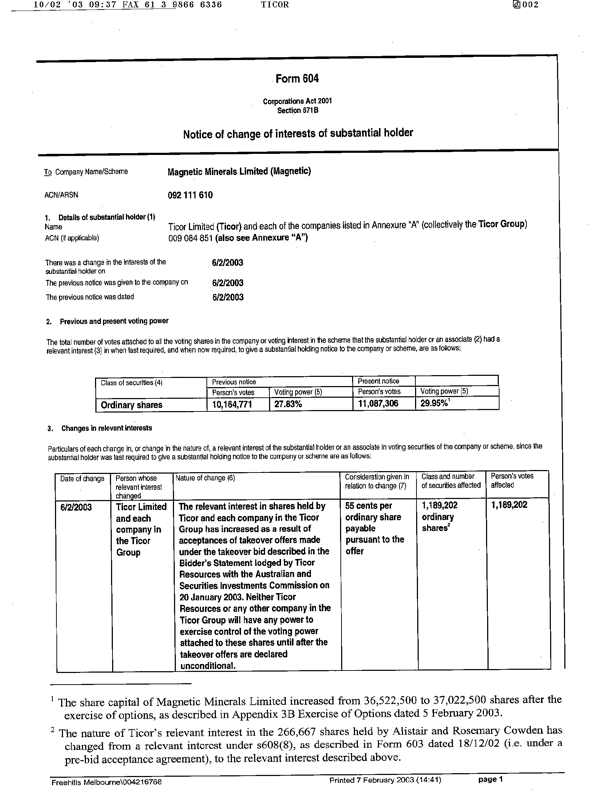

In [ ]:
from PIL import Image

# Path to a local placeholder image
path = "printed_images/00343763_page-1.png"

# Loading and displaying the image
image = Image.open(path)
width, height = image.size
display(image.resize((int(600), int(800))))
